# Home Assignment No. 3: Practice

To solve this task efficiently, here are some practical suggestions:

* Please include your name, surname and matriculation number in the beginning of the notebook file.

* Make sure that you download data.zip file and extract it to the same folder with this notebook file.

* Please contact Alp Eren SARI (alp.sari@unibe.ch) for questions and problems related to the assignment

* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [pandas](https://pandas.pydata.org/docs/reference/index.html), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that tutorials, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, the whole life?).


* Instead of rewriting existing code use **BUILT-IN METHODS** available in the libraries. There exists a class/method for almost everything you can imagine (related to this homework).


* To complete this part of the homework, you have to write some **CODE** directly inside the specified places in the notebook **CELLS**.


* In some problems you are asked to provide a short discussion of the results. In these cases you have to create a **MARKDOWN** cell with your comments right after the corresponding code cell.


* For every separate problem, you can get **INTERMEDIATE scores**, but there are **NO INTERMEDIATE scores** for separate cells.


* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e. if a reviewer executes your code, the output will be the same (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest to fix random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.


* Your code must be readable to any competent reviewer. For this purpose, try to include **necessary** (and not more) comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY**.


* Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameter and set it to `-1` to use all the cores.


* This assignment has $\color{red}{\text{(Bonus)}}$ tasks. They are optional. However, the points for them can be applied to improve the final grade for the course.


* In the end you need to hand in a **single zip file** containing **two notebooks** (theory and practice) as well as the **html exported version** of this notebook.


To begin let's import the essential (for this assignment) libraries.

In [1]:
import numpy as np
import pandas as pd

# for reproducibility
np.random.seed(0)

## Task 1. Feature Engineering and Bagging Ensembles of Regressors [8 points]

In this problem, you are to deal with [Student Stress Factors: A Comprehensive Analysis](https://www.kaggle.com/datasets/rxnach/student-stress-factors-a-comprehensive-analysis/) dataset.

Your goal will be to determine the optimal parameters for two Bagging-Based Forest Ensemble **Classifiers** and compare the forests.

In [2]:
from sklearn.model_selection import train_test_split

## Task 1.1. Feature Engineering [4 points]
We are going to use the 'depression' as our target variable. Since the values of this feature are between 0 and 27, we'll convert it into binary variable by thresholding. We'll classify students with 'depression' higher than 13 as depressed (1) and students with 'depression' lower or equal to 13 as not depressed (0)

In [3]:
# data loading
data = pd.read_csv('data/StressLevelDataset.csv').dropna()

### BEGIN Solution
# depression higher than 13 should be converted to 1, if it's equal to 13 or lower than 13, then it should be converted to 0
data['depression'] = (data['depression'] > 13).astype(int)


# 4 points
### END Solution
data = data.astype(np.float32)

X = data.drop('depression', axis=1)
y = data.depression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

data.sample(3).sort_index()

anxiety_level  self_esteem  mental_health_history  depression  headache  \
395            5.0         25.0                    0.0         0.0       1.0   
477           17.0         12.0                    1.0         1.0       4.0   
860           10.0         15.0                    1.0         0.0       3.0   

     blood_pressure  sleep_quality  breathing_problem  noise_level  \
395             2.0            5.0                1.0          1.0   
477             3.0            1.0                4.0          4.0   
860             1.0            3.0                2.0          2.0   

     living_conditions  ...  basic_needs  academic_performance  study_load  \
395                3.0  ...          4.0                   4.0         1.0   
477                2.0  ...          1.0                   2.0         3.0   
860                3.0  ...          3.0                   3.0         3.0   

     teacher_student_relationship  future_career_concerns  social_support  \
395                           4.0                     1.0             3.0   
477                           1.0                     5.0             1.0   
860                           2.0                     2.0             2.0   

     peer_pressure  extracurricular_activities  bullying  stress_level  
395            1.0                         1.0       1.0           0.0  
477            4.0                         4.0       4.0           2.0  
860            2.0                         3.0       2.0           1.0  

[3 rows x 21 columns]

## Task 1.2. Bagging Ensembles of Classifiers [4 points]

In this problem, you are going to compare different `RandomForestClassifier` and `ExtraTreesClassifier` models to predict a binary variable based on their **accuracy** in the test set. 

[Extremely Randomized Forest](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.65.7485&rep=rep1&type=pdf) is another bootstraped forest with a simple tree building algorithm. Each tree node split is chosen at random w.r.t. both feature and threshold (while in random forests the split minimizes impurity).

You have to do the following steps:

1. For both Forests perform the [**Grid Search**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) (on the train data) over the most important algorithm's parameters.

2. For the optimal parameters report the train, validation, and test scores. Note that ´RandomForestClassifier´ and ´ExtraTreesClassifier´ has a score function to calculate the coefficient of determination score for a given dataset. You may use this one to compute scores.

Decision Trees algorithms contain many heuristics. Most heuristics map well to objectives:

* **Splitting** by information gain $\rightarrow$ training loss

* **Pruning**  $\rightarrow$ regularization defined by the number of nodes

* **Maximum depth** $\rightarrow$ constraint on the function space

* **The minimum number of samples** required to be at a **leaf node** $\rightarrow$ smoothing the model, especially in regression

So, we will tune the following hyper-parameters: `n_estimators`, `max_depth`, `min_samples_split`, `min_samples_leaf`.


The Extra-(Randomized)-Trees might be a bit worse than Random Forests when there are many noisy features. From the article [Extremely Randomized Forest](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.65.7485&rep=rep1&type=pdf): 
> The analysis of the algorithm and the determination of the optimal value of K on several test problem variants have shown that the value is in principle dependent on problem specifics, in particular the proportion of irrelevant attributes. [...] The bias/variance analysis has shown that Extra-Trees work by decreasing variance while at the same time increasing bias. [...] _When the randomization increases above the optimal level, variance decreases slightly, while bias increases often significantly_.

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [5]:
def hyper_parameters_tuning(X_train, y_train, X_test, y_test, classifier, parameters, scoring, cv):
    print(f'Tuning hyper-parameters for {classifier.__class__.__name__}...\n')
    
    ### BEGIN Solution
    # use GridSearchCV for the given classifier, parameters and data
    clf = GridSearchCV(classifier, parameters, scoring=scoring, cv=cv)
    clf.fit(X_train, y_train)

    best_parameters = clf.best_params_
    train_score = clf.best_score_
    val_score = cross_val_score(clf, X_test, y_test, cv=cv).mean()
    test_score = clf.score(X_test, y_test)
    # 3 points
    
    ### END Solution
    
    print(f'Best hyper-parameters: {best_parameters}\n')

    print('Train: {:.3f}'.format(train_score))
    
    print('Valid: {:.3f}'.format(val_score))
    
    print('Test: {:.3f}\n'.format(test_score))

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [7]:
### BEGIN Solution
#declare parameters, random_forest and extra_trees classifiers
random_forest = RandomForestClassifier(n_jobs=-1)
extra_trees = ExtraTreesClassifier(n_jobs=-1)
parameters = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'ccp_alpha': [0.0, 0.1, 0.2],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}
# 1 points

### END Solution

hyper_parameters_tuning(np.array(X_train), np.array(y_train),
                        np.array(X_test), np.array(y_test),
                        random_forest,
                        parameters,
                        scoring='accuracy', cv=5)

hyper_parameters_tuning(np.array(X_train), np.array(y_train),
                        np.array(X_test), np.array(y_test),
                        extra_trees,
                        parameters,
                        scoring='accuracy', cv=5)

Tuning hyper-parameters for RandomForestClassifier...



c:\Users\beatb\.conda\envs\env_computer_vision\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\beatb\.conda\envs\env_computer_vision\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best hyper-parameters: {'ccp_alpha': 0.0, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 10}

Train: 0.870
Valid: 0.829
Test: 0.876

Tuning hyper-parameters for ExtraTreesClassifier...



c:\Users\beatb\.conda\envs\env_computer_vision\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\beatb\.conda\envs\env_computer_vision\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\beatb\.conda\envs\env_computer_vision\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\beatb\.conda\envs\env_computer_vision\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best hyper-parameters: {'ccp_alpha': 0.1, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 10}

Train: 0.875
Valid: 0.836
Test: 0.876



c:\Users\beatb\.conda\envs\env_computer_vision\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


## Task 2. AdaBoost [26 points]

> Boosting Machines (BM) is a family of widely popular and effective methods for classification and regression. The main idea behind BMs is that **combining weak learners**, that perform slightly better than random, can result in **strong learning models**.

> AdaBoost utilizes the greedy training approach: first, we train the weak learners (they are later called `base_classifiers`) on the whole dataset, and in the next iterations, we train the model on the samples, on which the previous models have performed poorly. This behavior is achieved by reweighting the training samples at each step. 

#### The task:

In this exercise, you are asked to implement one of the earlier variants of BMs - **AdaBoost**, a modified version of it and compare these to the already existing `sklearn` implementation. The key steps are:

* Copy the solution from task 1.1 so that `depression` variable is binarized.  

* Complete the `ada_boost_alpha`, `ada_boost_distribution` and `ada_boost_distribution_modify` functions

* Complete the `.fit` method of `Boosting` class

* Complete the `.predict` method of `Boosting` class

##### Criteria:

The decision boundary of the final implementation should look reasonably identical to the model from `sklearn`, and should achieve accuracy close to `scikit`:

$$ |\text{your\_accuracy} - \text{sklearn\_accuracy}| \leq 0.005 $$



In [8]:
from sklearn.datasets import make_moons

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
np.random.seed(0)

In [9]:
# data loading
data = pd.read_csv('data/StressLevelDataset.csv').dropna()

### BEGIN Solution
# depression higher than 13 should be converted to 1, if it's equal to 13 or lower than 13, then it should be converted to 0
data['depression'] = (data['depression'] > 13).astype(int)

### END Solution
data = data.astype(np.float32)

# we'll only use living_conditions and stress_level features
X = data[['living_conditions', 'stress_level']].to_numpy()
y = data.depression.to_numpy()

In [10]:
X.shape

(1100, 2)

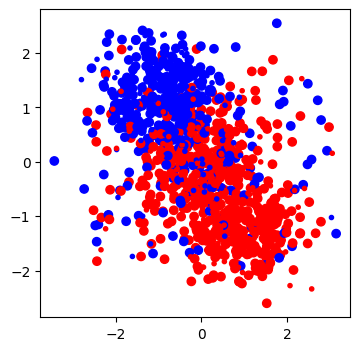

In [11]:
### plot the dataset

# X, y = make_moons(n_samples=1000, noise=0.3, random_state=0)
X = (X - np.mean(X, axis=0, keepdims=True)) / np.std(X, axis=0, keepdims=True)
X += 0.5 * np.random.randn(*X.shape) 
# for convenience convert labels from {0, 1} to {-1, 1}
y[y == 0] = -1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 30),
                     np.linspace(y_min, y_max, 30))

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

plt.figure(figsize=(4, 4))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
plt.scatter(X_test[:, 0], X_test[:, 1], marker='.', c=y_test, cmap=cm_bright);

**Base classifier**

In [12]:
from sklearn.tree import DecisionTreeClassifier

* `ada_boost_alpha` - function, which calculates the weights of the linear combination of the classifiers

* `ada_boost_distribution` - function, which calculates sample weights

* `ada_boost_distribution` - a modified function, which calculates sample weights

In [13]:
def ada_boost_alpha(y, y_pred_k, distribution):
    # y_pred_k is a prediction of the k-th base classifier
    
    ### BEGIN Solution
    err = np.dot(distribution, (y != y_pred_k).astype(int))/np.sum(distribution)

    err = np.clip(err, 1e-10, 1 - 1e-10)

    alpha = np.log((1 - err)/err)

    # 2 points
    
    ### END Solution

    return alpha

In [14]:
def ada_boost_distribution(y, y_pred_k, distribution, alpha_k):
    # y_pred_k is a prediction of the k-th base classifier
    
    ### BEGIN Solution
    distribution = distribution * np.exp(alpha_k * (y != y_pred_k).astype(int))
    
    # 2 points
    
    ### END Solution

    return distribution

* Now modify the `ada_boost_distribution` function so that the expression `y * y_pred_k` will be scaled between `-2t+1` and 1 for a t value which should be equal to `0.5`. After that, we'll also use a version of adaboost using this distrbution along with the original one. Hint: `y * y_pred_k` is equal to either -1 or 1.

In [15]:
def ada_boost_distribution_modify(y, y_pred_k, distribution, alpha_k, t=0.5):
    # y_pred_k is a prediction of the k-th base classifier
    
    ### BEGIN Solution
    scaled_values = (1 + (y * y_pred_k)) / 2 * (1 - (-2 * t + 1)) + (-2 * t + 1)
    
    distribution = distribution * np.exp(-alpha_k * scaled_values)
    
    ### END Solution

    return distribution

In [16]:
class AdaBoost(object):
    """
    Generic class for construction of boosting models
    
    :param n_estimators: int, number of estimators (number of boosting rounds)
    :param base_classifier: callable, a function that creates a weak estimator. Weak estimator should support sample_weight argument
    :param get_alpha: callable, a function, that calculates new alpha given current distribution, prediction of the t-th base estimator,
                      boosting prediction at step (t-1) and actual labels
    :param get_distribution: callable, a function, that calculates samples weights given current distribution, prediction, alphas and actual labels
    """
    def __init__(self,
                 base_classifier=None,
                 n_estimators=50,
                 get_alpha=ada_boost_alpha,
                 update_distribution=ada_boost_distribution):
        self.n_estimators = n_estimators
        self.base_classifier = base_classifier
        self.get_alpha = get_alpha
        self.update_distribution = update_distribution
        
    def fit(self, X, y):
        n_samples = len(X)
        distribution = np.ones(n_samples, dtype=float) / n_samples
        self.classifiers = []
        self.alphas = []
        for i in range(self.n_estimators):
            # create a new classifier
            
            self.classifiers.append(self.base_classifier())     
            self.classifiers[-1].fit(X, y, sample_weight=distribution)

            ### BEGIN Solution
            
            # make a prediction  
            y_pred = self.classifiers[-1].predict(X)
            # update alphas, append new alpha to self.alphas
            alpha_i = self.get_alpha(y, y_pred, distribution)
            self.alphas.append(alpha_i)
            # update distribution
            distribution = self.update_distribution(y, y_pred, distribution, alpha_i)
            # 6 points
            
            ### END Solution
    
    def predict(self, X):
        final_predictions = np.zeros(X.shape[0])
    
        ### BEGIN Solution
        
        # get the weighted votes of the classifiers
        
        for i in range(self.n_estimators):
            final_predictions += self.alphas[i] * self.classifiers[i].predict(X)
        
        out = np.sign(final_predictions)
        # 4 points
        
        ### END Solution

        return out

In [17]:
from sklearn.ensemble import AdaBoostClassifier

In [18]:
from sklearn.tree import DecisionTreeClassifier

np.random.seed(0)
n_estimators = 100
max_depth = 5

# sklearn
ada_boost_sklearn = AdaBoostClassifier(DecisionTreeClassifier(max_depth=max_depth),
                                       algorithm="SAMME",
                                       n_estimators=n_estimators)

ada_boost_sklearn.fit(X_train, y_train)

# custom

### BEGIN Solution
# get base function for the Adaboost class we implemented
func_classifier = lambda: DecisionTreeClassifier(max_depth=max_depth, random_state=0)

# declare adaboost classifier
ada_boost = AdaBoost(base_classifier=func_classifier, n_estimators=n_estimators, update_distribution=ada_boost_distribution)

# fit the classifier to the data
ada_boost.fit(X_train, y_train)
# 4 points

### END Solution

### BEGIN Solution
# declare modified adaboost classifier
ada_boost_mod = AdaBoost(base_classifier=func_classifier, n_estimators=n_estimators, update_distribution=ada_boost_distribution_modify)

# fit the classifier to the data
ada_boost_mod.fit(X_train, y_train)

# 4 points

### END Solution

In [19]:
classifiers = [ada_boost_sklearn, ada_boost, ada_boost_mod]
names = ['ada_boost_sklearn', 'ada_boost', 'ada_boost_mod']

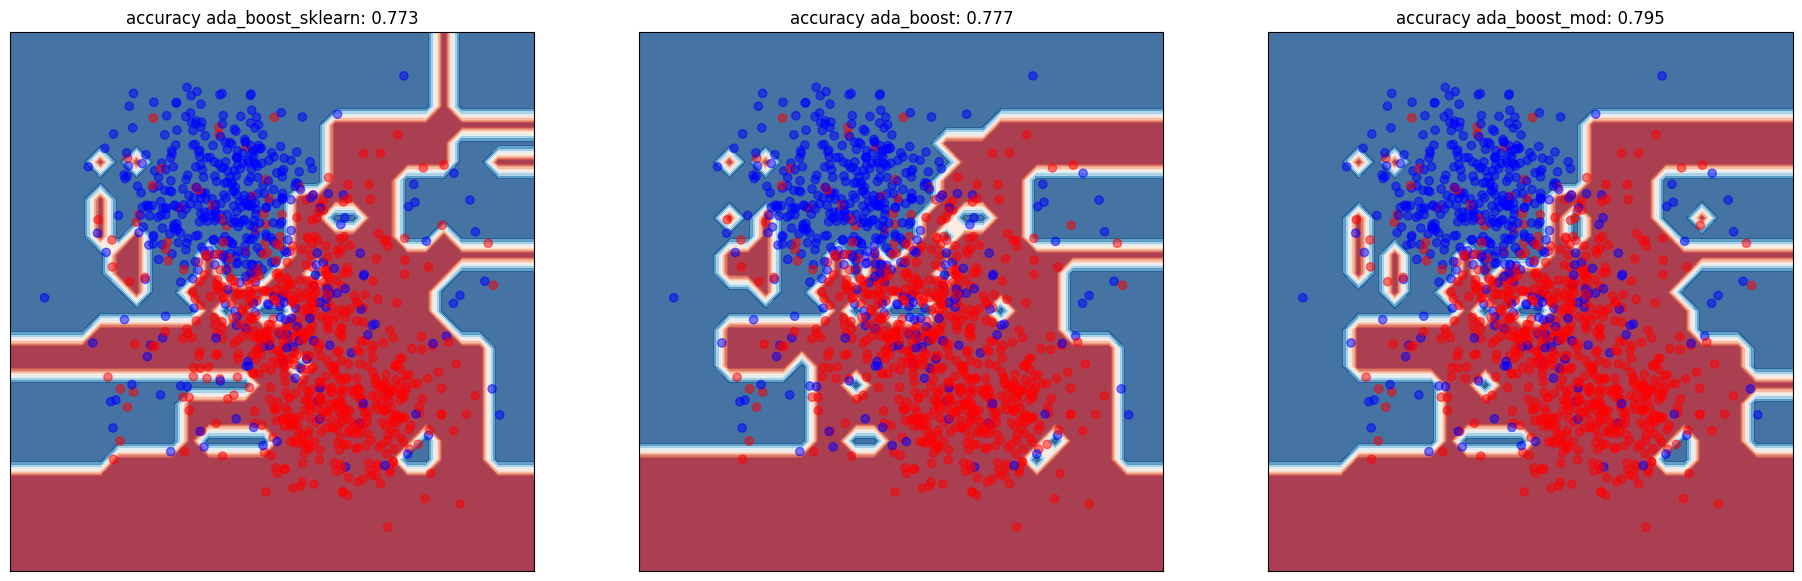

In [20]:
# test ensemble classifier

plt.figure(figsize=(23, 7))

for i, classifier in enumerate(classifiers):
    prediction = classifier.predict(X_test)

    # put the result into a color plot
    
    ax = plt.subplot(1, len(classifiers), i + 1)
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # plot also the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, alpha=0.5)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title('accuracy {}: {:.3f}'.format(names[i], (prediction == y_test).sum() * 1. / len(y_test)))

## Task 3. Gradient Boosting and Feature Selection [15 points]

**Gradient Boosting Machines** (GBM) are historical and logical continuations of the first boosting algorithms. In a way, one can consider AdaBoost as another variant of GBMs. These are effective tools widely used in industry, research, and various machine learning competitions. 

In this task, we offer to focus on one variant of GBM called [**XGBoost**](https://github.com/dmlc/xgboost/tree/master/python-package). The dataset that is going to be used is   [Titanic - Machine Learning from Disaster](https://www.kaggle.com/c/titanic).

You will need to construct an **XGBoost** classification model, train it, measure the training time and compare it to **Random Forest**. Afterward, compare the models' feature importances.

**The task:**

* Copy the the solution from task 1.1 so that `depression` variable is binarized.  

* Train the XGBoost classifier on the provided dataset

  * Measure the training time
  
  * Measure the precision/recall on the test set

* Train Random Forest classifier and compare it to XGBoost

* Compare the feature importances of the trained XGBoost and Random Forest Classifiers. Why do you think they are different? Explain.

**HINT**: in order to measure the training time you can use [**timeit** cell magic](http://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit) or [**time**](https://docs.python.org/3/library/time.html) library.

In [21]:
from xgboost import XGBClassifier

In [22]:
# data loading
data = pd.read_csv('data/StressLevelDataset.csv').dropna()

### BEGIN implementation
# depression higher than 13 should be converted to 1, if it's equal to 13 or lower than 13, then it should be converted to 0
data['depression'] = (data['depression'] > 13).astype(int)
## END implementation

data = data.astype(np.float32)

cols = list(data.drop('depression', axis=1))

X = data.drop('depression', axis=1)
y = data.depression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [23]:
from time import time
from sklearn.metrics import average_precision_score
from sklearn.ensemble import RandomForestClassifier

Implement and fit XGBClassifier and measure the convergence time

In [24]:
### BEGIN Solution

# declare xgb classifier

xgb_classifier = XGBClassifier(n_jobs=-1)

# fit the classifier to data and print the training time

start = time()
xgb_classifier.fit(X_train, y_train)
print('Training time: {:.2f} sec.'.format(time() - start))

# measure precision/recall and print the results

y_pred = xgb_classifier.predict(X_test)
print('Average precision score: {:.3f}'.format(average_precision_score(y_test, y_pred)))

# 4 points

Training time: 0.31 sec.
Average precision score: 0.722


Implement and fit RandomForestClassifier and measure the convergence time

In [25]:
# declare random forest classifier

random_forest = RandomForestClassifier(n_jobs=-1)

# fit the classifier to data and print the training time

start = time()
random_forest.fit(X_train, y_train)
print('Training time: {:.2f} sec.'.format(time() - start))

# measure precision/recall and print the results

y_pred = random_forest.predict(X_test)
print('Average precision score: {:.3f}'.format(average_precision_score(y_test, y_pred)))

# 4 points

### END Solution

Training time: 0.23 sec.
Average precision score: 0.715


In [26]:
len(cols)

20

Time to display the importance of the weights for XGBClassifier and RandomForestClassifier and compare them

In [27]:
from IPython.display import display

def highlight_zeros(s):
    is_max = s == 0
    
    return ['background-color: yellow' if v else '' for v in is_max]

display(pd.DataFrame(np.vstack((xgb_classifier.feature_importances_, random_forest.feature_importances_)),
                     index=['XGB Classifier', 'Random Forest Classifier'],
                     columns=cols).style.apply(highlight_zeros))

**Are the feature importances calculated by the previously trained XGBoost and Random Forest Classifiers different or the same, why?**

$\color{red}{\textbf{Your Solution: }}$

-----------------
They are different.  
The models have a different underlying ensambling strategies. Therefore they try to 'learn' in a slightly different way, which leads to different results, eventhough the the weak learners are the same. Although the importance can be close to similar.


$\color{red}{\textbf{7 points}}$

## Task 4. $\color{red}{\text{(Bonus)}}$. KMeans and Gaussian Mixture Algorithms [8 + 8 = 16 points]

Explore **KMeans** and **Gaussian Mixture** clustering algorithms from `sklearn`.

To evaluate the performance, use **two** metrics: `silhouette score` and `mutual information`

## Task 4.1. $\color{red}{\text{(Bonus)}}$. Grid Search [8 points]

For each algorithm **your task** is to find the parameters leading to the best performance for `n_clusters=true_number_of_clusters`.

Apply the algorithm with the best parameters with the true number of clusters and at least two **other settings** for the number of clusters: a smaller and a larger number than the true one.

**NOTE:** `sklearn.model_selection.GridSearchCV` does not support clustering methods. Hence you are supposed to do it manually.

In [28]:
import matplotlib.cm as cm
from sklearn import datasets

True number of clusters is 15


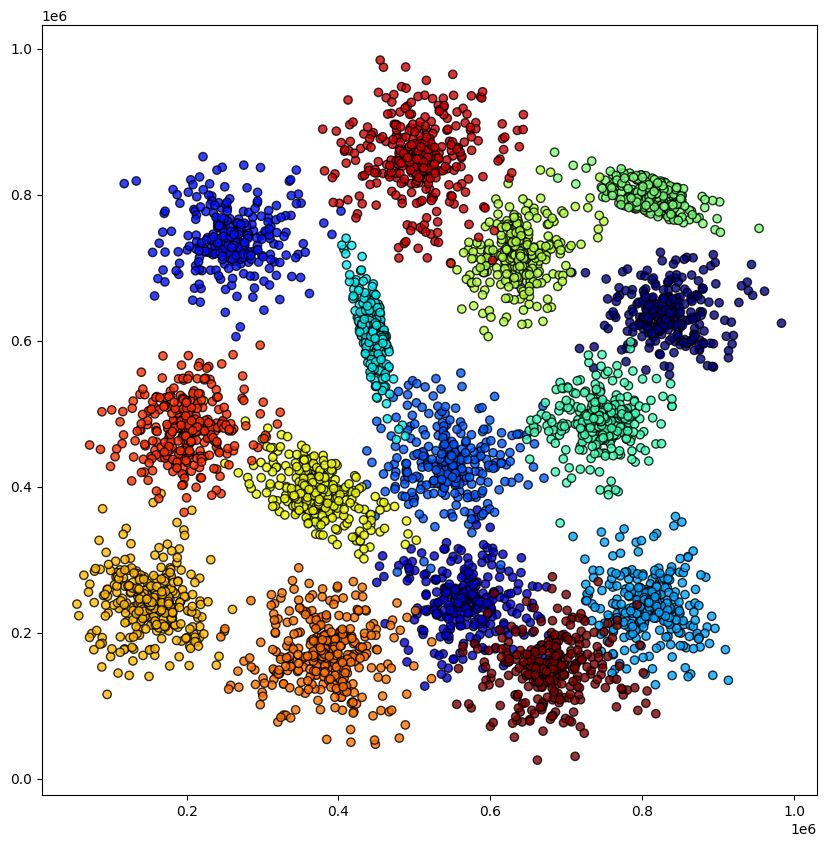

In [29]:
points, labels = np.loadtxt('data/clustering.txt'), np.loadtxt('data/clustering_labels.txt')
labels = labels.astype(int)
print("True number of clusters is {}".format(np.max(labels)))

plt.figure(figsize=(10, 10))
plt.scatter(points[:, 0], points[:, 1], c=labels, cmap=cm.jet, alpha=0.8, edgecolor='k')

plt.show()

In [30]:
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import silhouette_score, mutual_info_score

In [31]:
def grid_search(clasterizator, param_grid, metric, points, labels):
    ### BEGIN Solution
    # iterate over given param_grid and calculate the silhouette and mutual info scores
    
    best_score = -1
    best_params = None
    for params in ParameterGrid(param_grid):
        clasterizator.set_params(**params)
        y_pred = clasterizator.fit_predict(points)
        score = 0
        if metric == 'silhouette':
            score = silhouette_score(points, y_pred)
        else:
            score = mutual_info_score(labels, y_pred)
        
        if score > best_score:
            best_score = score
            best_params = params
    # 8 points
    
    ### END Solution
    
    return best_score, best_params

In [32]:
def print_results(clasterizator, param_grid, metrics, points, labels):
    for metric in metrics:
        best_score, best_parameters = grid_search(clasterizator, param_grid, metric, points, labels)
        print('{} score: {:.3f} via parameters: {}'.format(metric, best_score, best_parameters))
    print()

In [33]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

## Task 4.2. $\color{red}{\text{(Bonus)}}$. K-Mean and Gaussian Mixtures Algorithms [8 points]

* In this part, you are supposed to iterate over different cluster numbers, and do the grid search for each cluster number with `KMeans` and `GaussianMixture`. Moreover, print the best `silhouette` and `mutual_info` for each cluster number for `KMeans` and `GaussianMixture`.

In [34]:
clusters_numbers = [10, 15, 20]
scores = ['silhouette', 'mutual_info']

### BEGIN Solution
# iterate over clusters_numbers and do grid search and print best score for each cluster number choice
kmeans = KMeans(random_state=0)
para = {'n_clusters': [10],
        'init': ['k-means++', 'random'],
        'n_init': [10, 20, 30],}
metrics = ['silhouette_score', 'mutual_info_score']
print_results(kmeans, para, metrics, points, labels)



gmm = GaussianMixture(random_state=0)
para = {'n_components': [10],
        'n_init': [10, 20, 30],
        'init_params': ['kmeans', 'k-means++', 'random', 'random_from_data']}
metrics = ['silhouette_score', 'mutual_info_score']
print_results(gmm, para, metrics, points, labels)



kmeans = KMeans(random_state=0)
para = {'n_clusters': [15],
        'init': ['k-means++', 'random'],
        'n_init': [10, 20, 30],}
metrics = ['silhouette_score', 'mutual_info_score']
print_results(kmeans, para, metrics, points, labels)



gmm = GaussianMixture(random_state=0)
para = {'n_components': [15],
        'n_init': [10, 20, 30],
        'init_params': ['kmeans', 'k-means++', 'random', 'random_from_data']}
metrics = ['silhouette_score', 'mutual_info_score']
print_results(gmm, para, metrics, points, labels)


kmeans = KMeans(random_state=0)
para = {'n_clusters': [20],
        'init': ['k-means++', 'random'],
        'n_init': [10, 20, 30],}
metrics = ['silhouette_score', 'mutual_info_score']
print_results(kmeans, para, metrics, points, labels)



gmm = GaussianMixture(random_state=0)
para = {'n_components': [20],
        'n_init': [10, 20, 30],
        'init_params': ['kmeans', 'k-means++', 'random', 'random_from_data']}
metrics = ['silhouette_score', 'mutual_info_score']
print_results(gmm, para, metrics, points, labels)



    # 6 points

# 3 points
    
### END Solution

silhouette_score score: 2.078 via parameters: {'init': 'k-means++', 'n_clusters': 10, 'n_init': 10}
mutual_info_score score: 2.078 via parameters: {'init': 'k-means++', 'n_clusters': 10, 'n_init': 10}

silhouette_score score: 2.137 via parameters: {'init_params': 'kmeans', 'n_components': 10, 'n_init': 20}
mutual_info_score score: 2.137 via parameters: {'init_params': 'kmeans', 'n_components': 10, 'n_init': 20}

silhouette_score score: 2.561 via parameters: {'init': 'random', 'n_clusters': 15, 'n_init': 20}
mutual_info_score score: 2.561 via parameters: {'init': 'random', 'n_clusters': 15, 'n_init': 20}

silhouette_score score: 2.572 via parameters: {'init_params': 'k-means++', 'n_components': 15, 'n_init': 10}
mutual_info_score score: 2.572 via parameters: {'init_params': 'k-means++', 'n_components': 15, 'n_init': 10}

silhouette_score score: 2.559 via parameters: {'init': 'random', 'n_clusters': 20, 'n_init': 20}
mutual_info_score score: 2.559 via parameters: {'init': 'random', 'n_cl

Apply the algorithm with the **best parameters on silhouette score** for

* Cluster number of 10, 15 and 20. Use the best parameters for each cluster number using the `grid_search` you implemented

* Visualize the results for each case (6 cases in total: 10, 15, 20 clusters with KMeans and GaussianMixture) using the `plot_results` function we implemented.

In [35]:
def plot_results(ax, clasterizator_name, n_clusters, pred_labels):
    ax.scatter(points[:,0], points[:,1], c=pred_labels, cmap=cm.jet, alpha=0.8, edgecolor='k')
    ax.set_title('{} with {} clusters'.format(clasterizator_name, n_clusters))

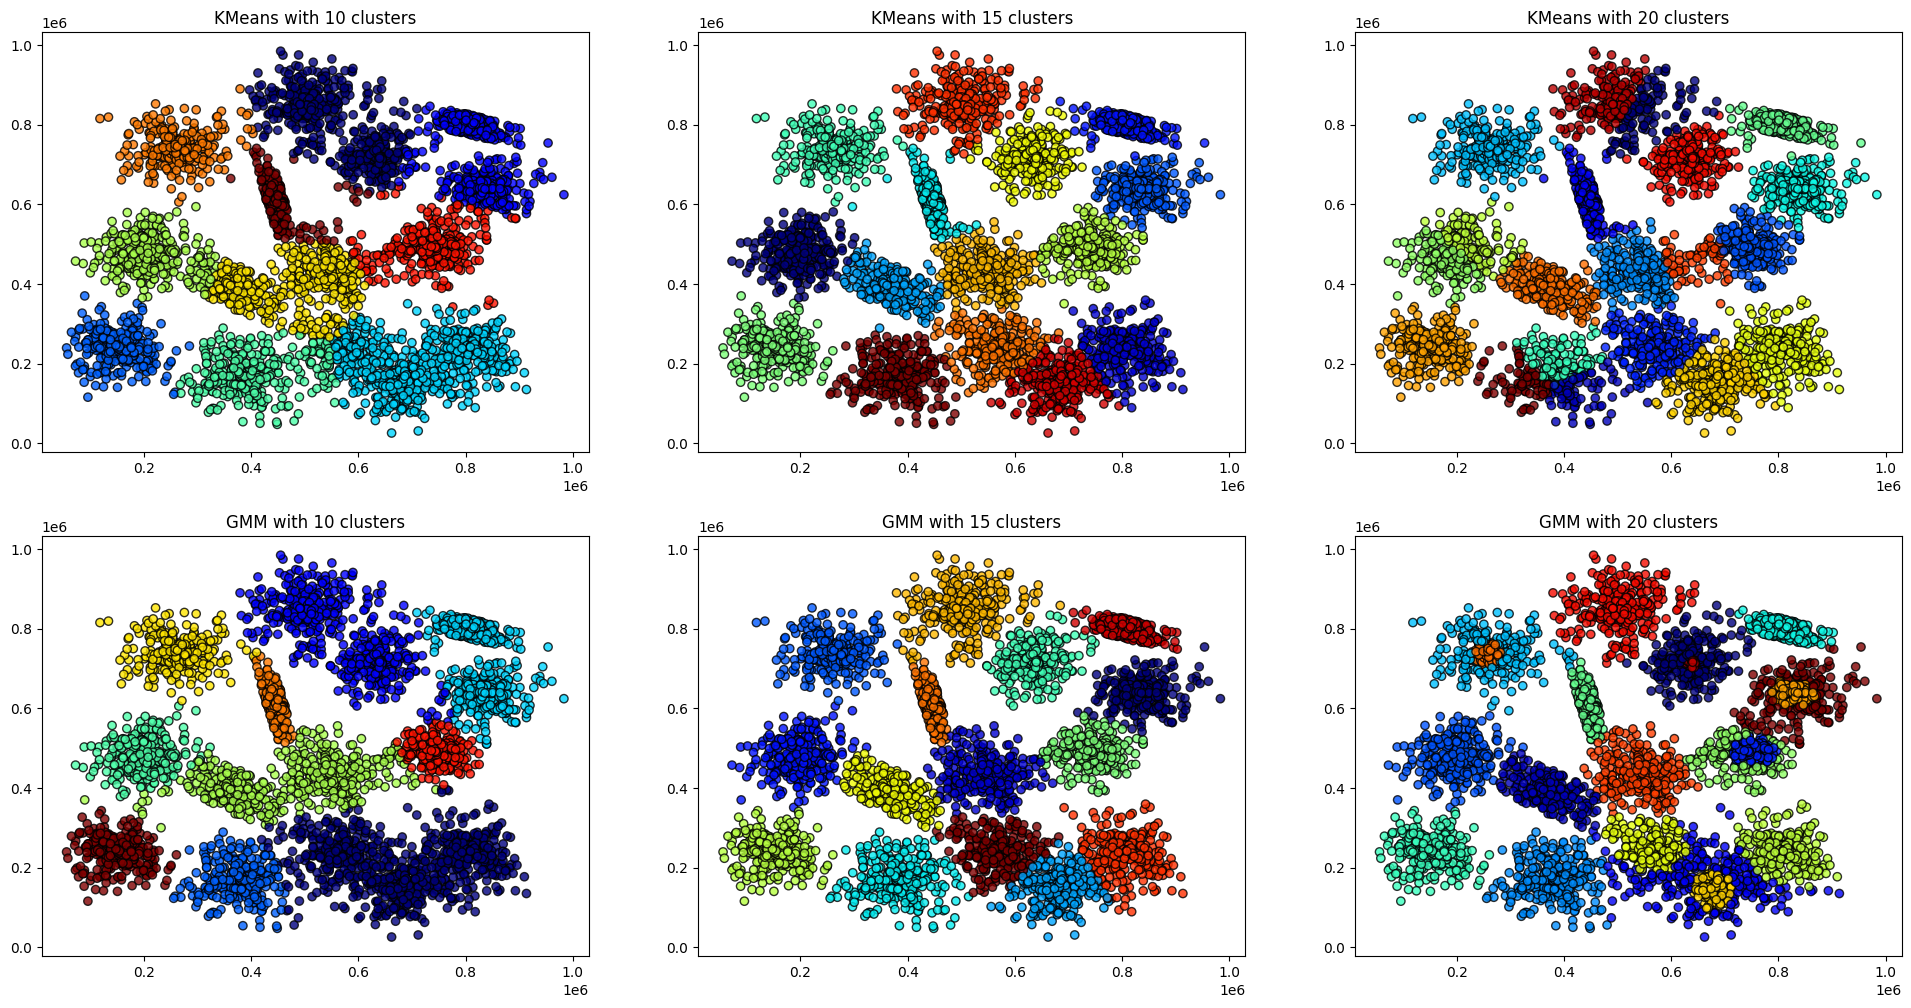

In [36]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(24, 12))
clusters_numbers = [10, 15, 20]

### BEGIN Solution
# iterate over cluster numbers do the prediction with best KMeans and GaussianMixture model and visualize the results

for i, n_clusters in enumerate(clusters_numbers):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, init='random', n_init=20)
    gmm = GaussianMixture(n_components=n_clusters, random_state=0, init_params='k-means++', n_init=10)
    
    kmeans.fit(points)
    gmm.fit(points)
    
    kmeans_pred = kmeans.predict(points)
    gmm_pred = gmm.predict(points)
    
    plot_results(axes[0, i], 'KMeans', n_clusters, kmeans_pred)
    plot_results(axes[1, i], 'GMM', n_clusters, gmm_pred)
    # 6 points

# 5 points

### END Solution

## Task 5. Clustering [24 + 16 $\color{red}{\text{(Bonus)}}$ + 10 = 50 points]

In this task you will:

* implement **k-means** clustering;

* train a **Mixture of Gaussian** model by implementing the **EM** algorithm.

Let's generate some test data for you to test your implementation of the k-means and EM algorithm.

Note that we generate gaussian blobs with non-isotropic covariance matrices.

In [37]:
from scipy.stats import multivariate_normal

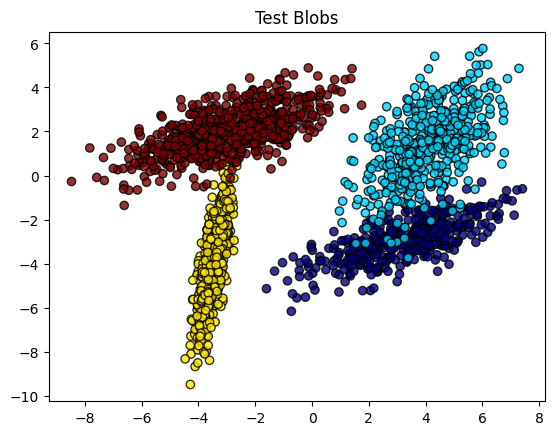

In [38]:
# generate samples of 4 different gaussians
rv1 = multivariate_normal.rvs([3.0, -3.], [[3.0, 1.2], [1.2, 0.9]], size=400, random_state=0)
rv2 = multivariate_normal.rvs([4.0, 1.25], [[1.45, 1.15], [1.15, 2.75]], size=500, random_state=0)
rv3 = multivariate_normal.rvs([-3.5, -4.0], [[0.1, 0.4], [0.4, 3.]], size=600, random_state=0)
rv4 = multivariate_normal.rvs([-3., 2.], [[3, 1.1], [1.1, 1]], size=700, random_state=0)

# concatenate the samples and create corresponding labels
X = np.concatenate([rv1, rv2, rv3, rv4], 0)
y = np.array([0]*400 + [1]*500 + [2]*600 + [3]*700)

# plot the test data

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm.jet, alpha=0.8, edgecolor='k')
plt.title("Test Blobs")
plt.show()

## Task 5.1. A modified K-Means [24 points]

You will need to implement the a slighlt modified **k-means** clustering algorithm and test it on the generated test data. Initialize the cluster centers from a Gaussian distribution with a mean 0 and covariance matrix $\sigma I$ where $\sigma = 0.2 \times max(|X|)$ if you flatten $X$; hence, $\sigma$ is a scallar. Morever, use L-infinity norm to assign data points to clusters instead of L2 norm which is $max(abs(x))$ for a vector $x$.

In [39]:
class KMeansCustom(object):
    def __init__(self, n_clusters, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        
        self.cluster_centers_ = None
        self.labels_ = None
    
    def fit(self, X):
        ### BEGIN Solution
        
        # 1st step: chose n_clusters random rows of X as initial cluster centers     
        sigma = 0.2 * np.max(np.abs(X.flatten()))
        self.cluster_centers_ = np.random.multivariate_normal(np.zeros(X.shape[1]), sigma * np.eye(X.shape[1]), self.n_clusters)    

        # 2nd step: update the cluster assignment
        for _ in range(self.max_iter):
            distances = np.max(abs(X[:, np.newaxis] - self.cluster_centers_), axis=2)
            self.labels_ = np.argmin(distances, axis=1)
            new_centers = np.array([X[self.labels_ == i].mean(axis=0) for i in range(self.n_clusters)])
        # 3rd step: check for convergence
            if np.allclose(self.cluster_centers_, new_centers):
                break
        # 4th step: update the cluster centers based on the new assignment
            self.cluster_centers_ = new_centers
        
        # 6 + 7 + 4 + 7 = 24 points
        
        ### END Solution

Let's test your implementation.

In [40]:
def plot_clusters(X, clasterizator):
    clasterizator.fit(X)
    
    plt.clf()
    
    plt.scatter(X[:, 0], X[:, 1], c=clasterizator.labels_, cmap=cm.jet)
    plt.scatter(clasterizator.cluster_centers_[:, 0], clasterizator.cluster_centers_[:, 1], c='r', marker='x')
    
    plt.title("Predicted clustering")
    plt.show()

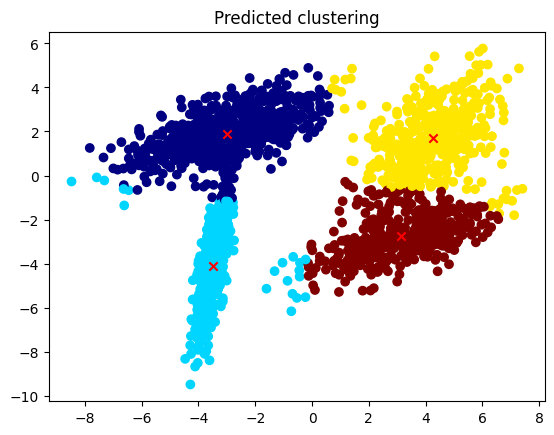

In [41]:
plot_clusters(X, KMeansCustom(n_clusters=4))

## Task 5.2 $\color{red}{\text{(Bonus)}}$. Expectation Maximization [16 points]

In this task, you will need to implement the EM algorithm for the Mixture of Gaussian models.

* Let's implement the **E-step** of the EM algorithm.

**Hints**:

* Use `scipy.stats.multivariate_normal.pdf()` to compute the pdf of a gaussian with the current parameters.

* $\omega = \mathbb{P}(z = j | x; \mu, \sigma, \phi)$

In [42]:
from scipy.stats import multivariate_normal

In [43]:
def e_step(X, mu, sigma, phi):
    ### BEGIN Solution
    # implement e-step of EM algorithm
    w = np.zeros((X.shape[0], mu.shape[0]))
    
    for j in range(mu.shape[0]):
        for i in range(X.shape[0]):
            numerator = phi[j] * multivariate_normal.pdf(X[i], mu[j], sigma[j])
            denominator = np.sum([phi[l] * multivariate_normal.pdf(X[i], mu[l], sigma[l]) for l in range(mu.shape[0])])
            w[i, j] =  numerator/ denominator
        
    # 2 points
    
    ### END Solution
    
    return w

* Let's update all the model parameters as per the **M-step** of the EM.

In [44]:
def m_step(w, X, mu, sigma, phi, n_gaussians):
    ### BEGIN Solution
    # implement m-step of EM algorithm
    
    for j in range(n_gaussians):
        mu[j] = np.sum(w[:, j][:, np.newaxis] * X, axis=0) / np.sum(w[:, j])
        sigma[j] = np.dot((w[:, j][:, np.newaxis] * (X - mu[j])).T, X - mu[j]) / np.sum(w[:, j])
        phi[j] = np.sum(w[:, j]) / X.shape[0]
    
    # 6 points
    
    ### END Solution
    
    return phi, mu, sigma

* Let's implement the **log-likelihood** of the data under the current model to check for convergence of the algorithm.

In [45]:
def log_likelihood(X, mu, sigma, phi):
    ### BEGIN Solution
    # implement log-likelihood 
    log_likelihood_value = 0
    for i in range(X.shape[0]):
        sum = 0
        for j in range(mu.shape[0]):
            sum +=  phi[j] * multivariate_normal.pdf(X[i], mu[j], sigma[j])
        log_likelihood_value += np.log(sum)
    # 2 points
    
    ### END Solution
    
    return log_likelihood_value

Finally, fit the Mixture of Gaussians model using the **EM algorithm**.

**Hint**:

* $\phi$ is a vector of probabilities for the latent variables $z$ of shape `[n_gaussians]`

* $\mu$ is a marix of mean vectors of shape `[n_gaussians, num_features]` 

* $\sigma$ is a list of length `[n_gaussians]` of covariance matrices each of shape `[num_features, num_features]`

* $w$ is a vector of weights for the `[n_gaussians]` gaussians per example of shape `[n_gaussians, k]` (a result of the E-step)

In [46]:
def EM(X, n_gaussians, max_iter=20):
    # initialization
    
    mu = None
    sigma = [np.eye(X.shape[1]) for i in range(n_gaussians)]
    phi = np.ones([n_gaussians,]) / n_gaussians
    
    log_likelihood_previous = float('inf')
    
    ### BEGIN Solution
    
    # Use k-means to initialize the means of the gaussians
    
    kmeans = KMeansCustom(n_clusters=n_gaussians)
    kmeans.fit(X)
    mu = kmeans.cluster_centers_
    
    for _ in range(max_iter):
        # E-Step
        w = e_step(X, mu, sigma, phi)
    
        # M-step
        phi, mu, sigma = m_step(w, X, mu, sigma, phi, n_gaussians)
        
        # check convergence  
        l_new = log_likelihood(X, mu, sigma, phi)
        if np.abs(l_new - log_likelihood_previous) < 1e-5:
            break
        log_likelihood_previous = l_new

    
    # compute final assignment
    w = e_step(X, mu, sigma, phi)
    phi, mu, sigma = m_step(w, X, mu, sigma, phi, n_gaussians)
    
    # 6 points
    
    ### END Solution
    
    return phi, mu, sigma, w

Let's test your implementation.

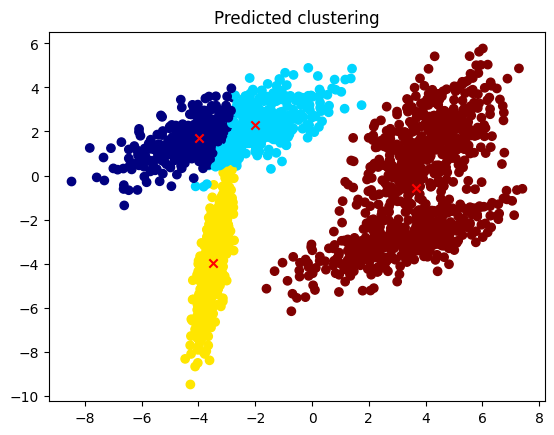

In [47]:
phi, mu, sigma, w = EM(X, n_gaussians=4)

plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=np.argmax(w, 1), cmap=cm.jet)
plt.scatter(mu[:, 0], mu[:, 1], c='r', marker='x')
plt.title("Predicted clustering")
plt.show()

## Task 5.3.1 K-Means for Image Compression [6 points]

You will now use **k-means to cluster pixel values of an image** and use the cluster assignments as a way to quantize/compress the color-space of the image.

Feel free to test the algorithm on your own images and with different number of clusters.
* Let's implement the KMeans function for our images which applies K-Means clustering in pixel space

In [48]:
def kmeans_colors(image, n_colors, clasterizator):
    ### BEGIN Solution
    # take the image and apply kmeans so that final image will only have n_colors pixels
   
    image_reshaped = image.copy().reshape(-1, 3)

    pred = clasterizator.fit_predict(image_reshaped)
    centers = clasterizator.cluster_centers_
    for i in range(n_colors):
        image_reshaped[pred == i] = centers[i]
    
    # 6 points
    
    ### END Solution

    return image_reshaped

## Task 5.3.2 K-Means for Image Compression with Different Number of Pixels [4 points]

Let's test your implementation and try to quantize the given image into 3, 6, 9 and 12 colors in HSV color space. For each quantization case:

* Take the image which is already in HSV color space and then perform the quantization

* Calculate mean squared error between the original image and the quantized image.

* Convert the quantized image to RGB colorspace for visualization

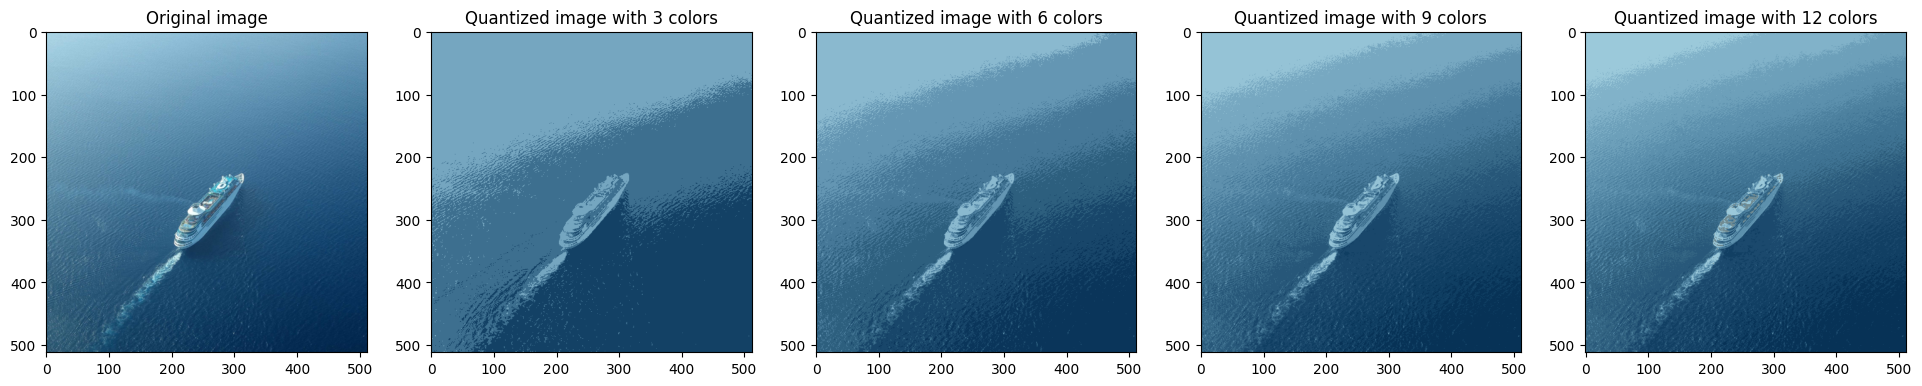

In [49]:
from PIL import Image
from sklearn.cluster import KMeans
import cv2

fig, axes = plt.subplots(ncols=5, nrows=1, figsize=(24, 12))

# load and show test image
image = Image.open('data/ship_image.jpg').resize((512, 512))
axes[0].imshow(image)
axes[0].set_title("Original image")

image = np.array(image.convert('HSV'))
image_reshaped = image.reshape(-1, 3)


image_losses = np.array([])
for i in range(4):
    n_colors = (i + 1) * 3
    
    ### BEGIN Solution
    # compute quantized image
    image_quantized = kmeans_colors(image, n_colors, KMeans(n_clusters=n_colors))
    image_losses= np.append(image_losses, np.mean((image_reshaped - image_quantized) ** 2))
    # show the quantized image
    image_quantized = image_quantized.reshape(image.shape)
    new_image = Image.fromarray(image_quantized, 'HSV')
    new_image_rgb = new_image.convert('RGB')

    axes[i + 1].imshow(new_image_rgb)
    axes[i + 1].set_title("Quantized image with {} colors".format(n_colors))

    # 4 points
    
    ### END Solution


Let's draw the plot of the MSE vs number colors 

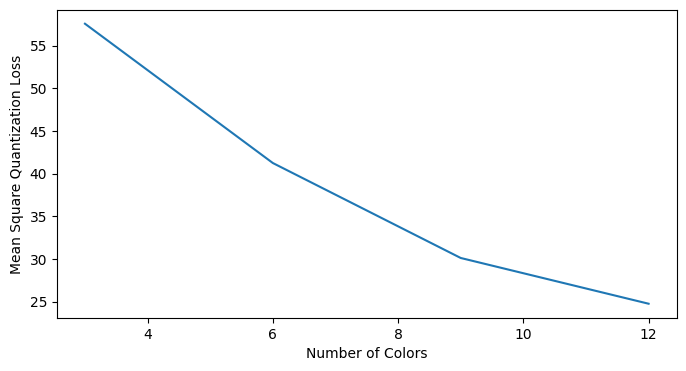

In [50]:
plt.figure(figsize=(8, 4))
plt.plot([3*(i+1) for i in range(4)], image_losses)
plt.xlabel('Number of Colors')
plt.ylabel('Mean Square Quantization Loss')
plt.show()